In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, precision_score, recall_score, plot_precision_recall_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def get_scores(report_df, model, X_test, y_test, name):
    '''Create and add metrics into a pandas DF after experiment'''

    report = pd.DataFrame(columns={'ROC-AUC'}, data=[0])
    report['ROC-AUC'] = roc_auc_score(y_test,
                                      model.predict_proba(X_test)[:, 1])
    report['PR-AUC'] = precision_score(y_test,model.predict(X_test))
    report['F1'] = f1_score(y_test, model.predict(X_test))
    report['precision_Neg'] = precision_score(
        y_test, model.predict(X_test), pos_label=0)
    report['precision_Pos'] = precision_score(
        y_test, model.predict(X_test), pos_label=1)
    report['recall_Neg'] = recall_score(
        y_test, model.predict(X_test), pos_label=0)
    report['recall_Pos'] = recall_score(
        y_test, model.predict(X_test), pos_label=1)

    report.index = [name]
    report_df = report_df.append(report)
    return report_df

In [3]:
df_report = pd.DataFrame(data=None)

# РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

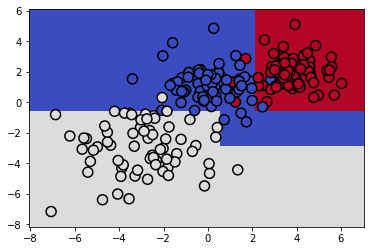

In [4]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за 3 , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [5]:
df= pd.read_csv('bill_authentication.csv')

In [6]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
X = df.drop('Class',axis=1)
y = df[['Class']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=17)

In [9]:
d_t = DecisionTreeClassifier(max_depth=3,max_features=2,random_state=17)

In [10]:
d_t.fit(X_train,y_train)
y_pred = d_t.predict(X_test)

In [11]:
f1_score(y_test,y_pred)

0.8663967611336032

In [12]:
f = np.array([2.04378,-0.38422,1.437292,0.76421])

In [13]:
d_t.predict(f.reshape(1,4))

array([0], dtype=int64)

# Визуализация разделения на 3 класса. Переобученное дерево

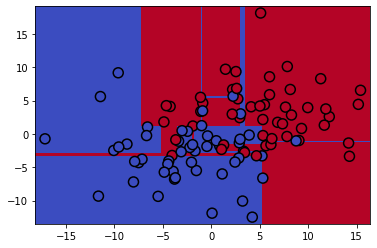

In [14]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

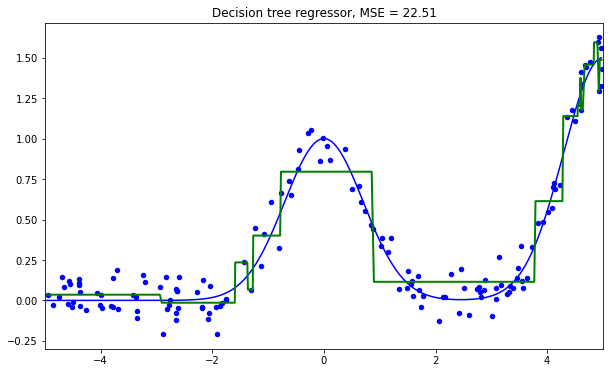

In [15]:
RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива

In [16]:
fuel = pd.read_csv('petrol_consumption.csv')

In [17]:
fuel[:3]

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [18]:
X = fuel.drop('Petrol_Consumption', axis=1)
y= fuel[['Petrol_Consumption']]

In [19]:
tree_clf = DecisionTreeRegressor( random_state=42)


In [20]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [21]:
tree_clf.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
tree_clf.get_depth()

11

In [23]:
y_pred = tree_clf.predict(X_test)

In [24]:
y_pred

array([603., 610., 574., 699., 487., 644., 467., 782., 487., 541., 580.,
       467., 457., 782., 699.])

In [25]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [26]:
rmse

87.96514461232168

# ЗАДАЧА О ВИНАХ БЭГГИНГ

Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

In [27]:
wine = pd.read_csv('winequality-red.csv',sep=';')

In [28]:
wine['good'] = wine['quality'].apply(lambda x:1 if x>=6 else 0)
wine = wine.drop('quality',axis=1)

In [29]:
X = wine.drop('good', axis=1)
y = wine[['good']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [32]:
df_report = get_scores(df_report,lr,X_test, y_test,'LR')

In [33]:
df_report

,ROC-AUC,PR-AUC,F1,precision_Neg,precision_Pos,recall_Neg,recall_Pos
LR,0.794939,0.762452,0.753788,0.689498,0.762452,0.70892,0.745318


In [34]:
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [35]:
df_report = get_scores(df_report,tree,X_test, y_test,'TREE')
df_report

,ROC-AUC,PR-AUC,F1,precision_Neg,precision_Pos,recall_Neg,recall_Pos
LR,0.794939,0.762452,0.753788,0.689498,0.762452,0.708920,0.745318
TREE,0.773523,0.763889,0.792793,0.755208,0.763889,0.680751,0.823970


In [36]:
bagg = BaggingClassifier(base_estimator=tree,n_estimators=1500, random_state=42)
bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [37]:
df_report = get_scores(df_report,bagg,X_test, y_test,'BAGGING')
df_report

,ROC-AUC,PR-AUC,F1,precision_Neg,precision_Pos,recall_Neg,recall_Pos
LR,0.794939,0.762452,0.753788,0.689498,0.762452,0.708920,0.745318
TREE,0.773523,0.763889,0.792793,0.755208,0.763889,0.680751,0.823970
BAGGING,0.875525,0.827586,0.818182,0.767123,0.827586,0.788732,0.808989


In [38]:
weather=pd.read_csv('temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [40]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [41]:
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [43]:
rf_best = RandomForestRegressor(n_estimators=1000,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                max_features= 'sqrt',
                                max_depth=10,
                                bootstrap=True,random_state=42)

In [44]:
rf_best.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [45]:
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [46]:
a = mean_squared_error(Y_val,rf_best.predict(X_val))
a


23.10053911088241

In [47]:
b = mean_squared_error(Y_val,rf.predict(X_val))
b

24.570648328267477

In [48]:
b-a

1.470109217385069